In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [36]:
catalog = pd.read_csv('data/data_catalogue.csv')
data = pd.read_csv('data/data_arena_members.csv')

In [9]:
def plot_hist2d(x,
                y,
                title,
                xlabel,
                ylabel,
                ax,
                bins=(50,50),
                cmap=plt.cm.BuPu):
    ax.hist2d(x, y, bins=bins, cmap=cmap)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def price_ditributions(catalog, price='creds'):
    if not price in ['creds', 'gold']:
        raise ValueError('Can display only creds and gold distibutions!')
    fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(16,30))
    for i, ax in enumerate(axs.flat):
        ax.set_title(f'Level {i + 1}')
        sns.distplot(catalog[catalog['item_level']==i+1]['item_price_credit' if price=='creds' else 'item_price_gold'].values,
                     kde=i!=0 and i!=9, bins=15, ax=ax)
    plt.show()

# Working with "catalog"

In [37]:
removed_tanks = pd.DataFrame()

masks = [
    ('cleaning by crew_size: 2 <= crew_size <= 6', \
    (catalog['crew_size'] >= 2) & (catalog['crew_size'] <= 6)),
    
    ('cleaning by 1 level: item_price_credit = item_price_gold = 0', \
    (catalog['item_level'] != 1) | \
    ((catalog['item_price_credit'] == 0) & (catalog['item_price_gold'] == 0))),
    
    ('cleaning by price: item_price_credit > 100 or item_price_gold > 100', \
    (catalog['item_level'] == 1) | \
    (((catalog['item_price_credit'] > 100) & (catalog['item_price_gold'] == 0)) | \
    ((catalog['item_price_credit'] == 0) & (catalog['item_price_gold'] > 100)))),
    
    ('custom cleaning by price 2 level: 2000 < item_price_credit < 20000', \
    (catalog['item_level'] != 2) | (catalog['item_price_gold'] != 0) | \
    (catalog['item_price_credit'] > 2000) & (catalog['item_price_credit'] < 20000)),
    
    ('custom cleaning by price 5 level: item_price_credit < 500000', \
    (catalog['item_level'] != 5) | \
    (catalog['item_price_gold'] != 0) | (catalog['item_price_credit'] < 500000))
]

for mask in masks:
    N = len(catalog)
    
    removed_tanks = pd.concat([removed_tanks, catalog.loc[~mask[1]]])
    catalog = catalog.loc[mask[1]]

    print(f'[{mask[0].upper()}]: removed {N - len(catalog)} rows.')
    
catalog.reset_index()
removed_tanks.reset_index()

print(f'\nTotally removed {len(removed_tanks)} rows.')

[CLEANING BY CREW_SIZE: 2 <= CREW_SIZE <= 6]: removed 7 rows.
[CLEANING BY 1 LEVEL: ITEM_PRICE_CREDIT = ITEM_PRICE_GOLD = 0]: removed 9 rows.
[CLEANING BY PRICE: ITEM_PRICE_CREDIT > 100 OR ITEM_PRICE_GOLD > 100]: removed 98 rows.
[CUSTOM CLEANING BY PRICE 2 LEVEL: 2000 < ITEM_PRICE_CREDIT < 20000]: removed 20 rows.
[CUSTOM CLEANING BY PRICE 5 LEVEL: ITEM_PRICE_CREDIT < 500000]: removed 1 rows.

Totally removed 135 rows.


In [38]:
removed_tanks

item_cd  item_class  item_price_credit  item_price_gold  item_level  \
628    46145   lightTank                  0                0          10   
630    46353   heavyTank                  0                0          10   
762    57857  mediumTank                  0                1           1   
791    59921         SPG                  0                0           1   
880    65025   lightTank                  0                0           1   
..       ...         ...                ...              ...         ...   
606    42753  mediumTank             915000                0           2   
607    42769   lightTank                500                0           2   
608    43009   lightTank              38500                0           2   
610    43265   lightTank              39300                0           2   
293     9729   lightTank             725000                0           5   

     crew_size  
628          1  
630          1  
762          1  
791          0  
880          1  
..         ...  
606          5  
607          3  
608          3  
610          2  
293          4  

[135 rows x 6 columns]

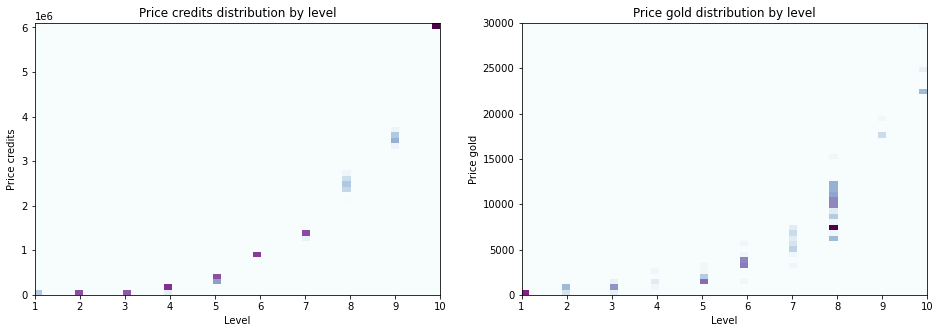

In [39]:
creds_catalog = catalog[catalog['item_price_gold'] == 0]
gold_catalog = catalog[catalog['item_price_credit'] == 0]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,5))

plot_hist2d(x=creds_catalog['item_level'],
            y=creds_catalog['item_price_credit'],
            title='Price credits distribution by level',
            xlabel='Level',
            ylabel='Price credits',
            ax=axs[0])

plot_hist2d(x=gold_catalog['item_level'],
            y=gold_catalog['item_price_gold'],
            title='Price gold distribution by level',
            xlabel='Level',
            ylabel='Price gold',
            ax=axs[1])

plt.show()

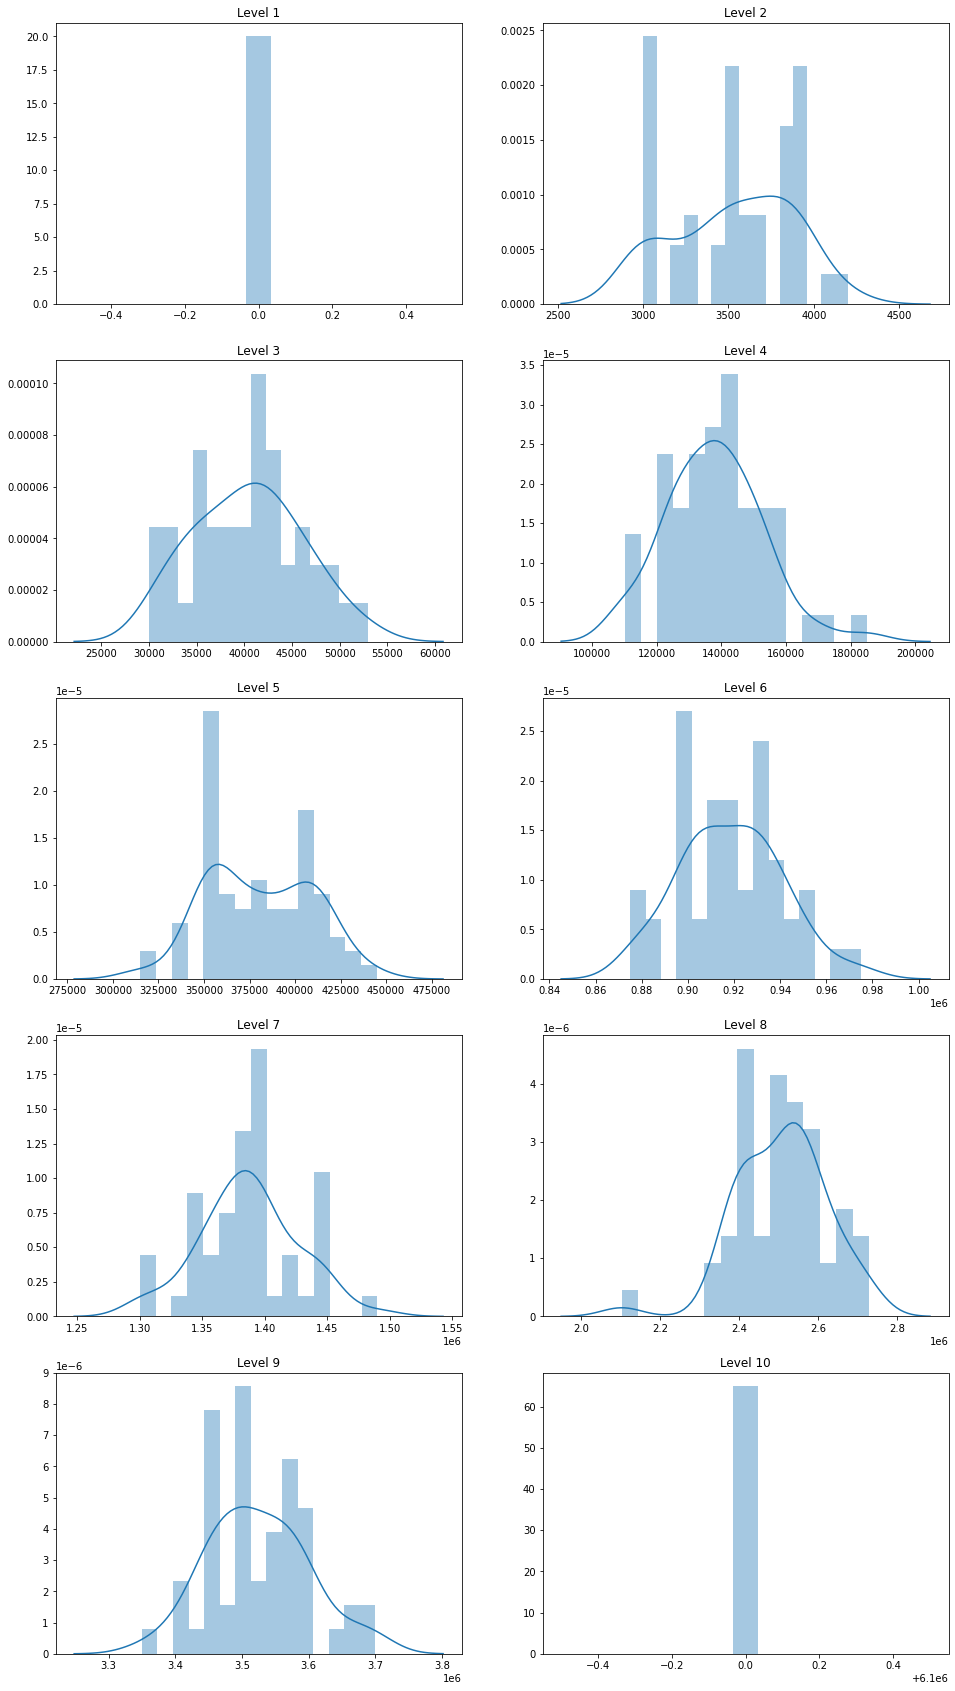

In [337]:
price_ditributions(creds_catalog, price='creds')

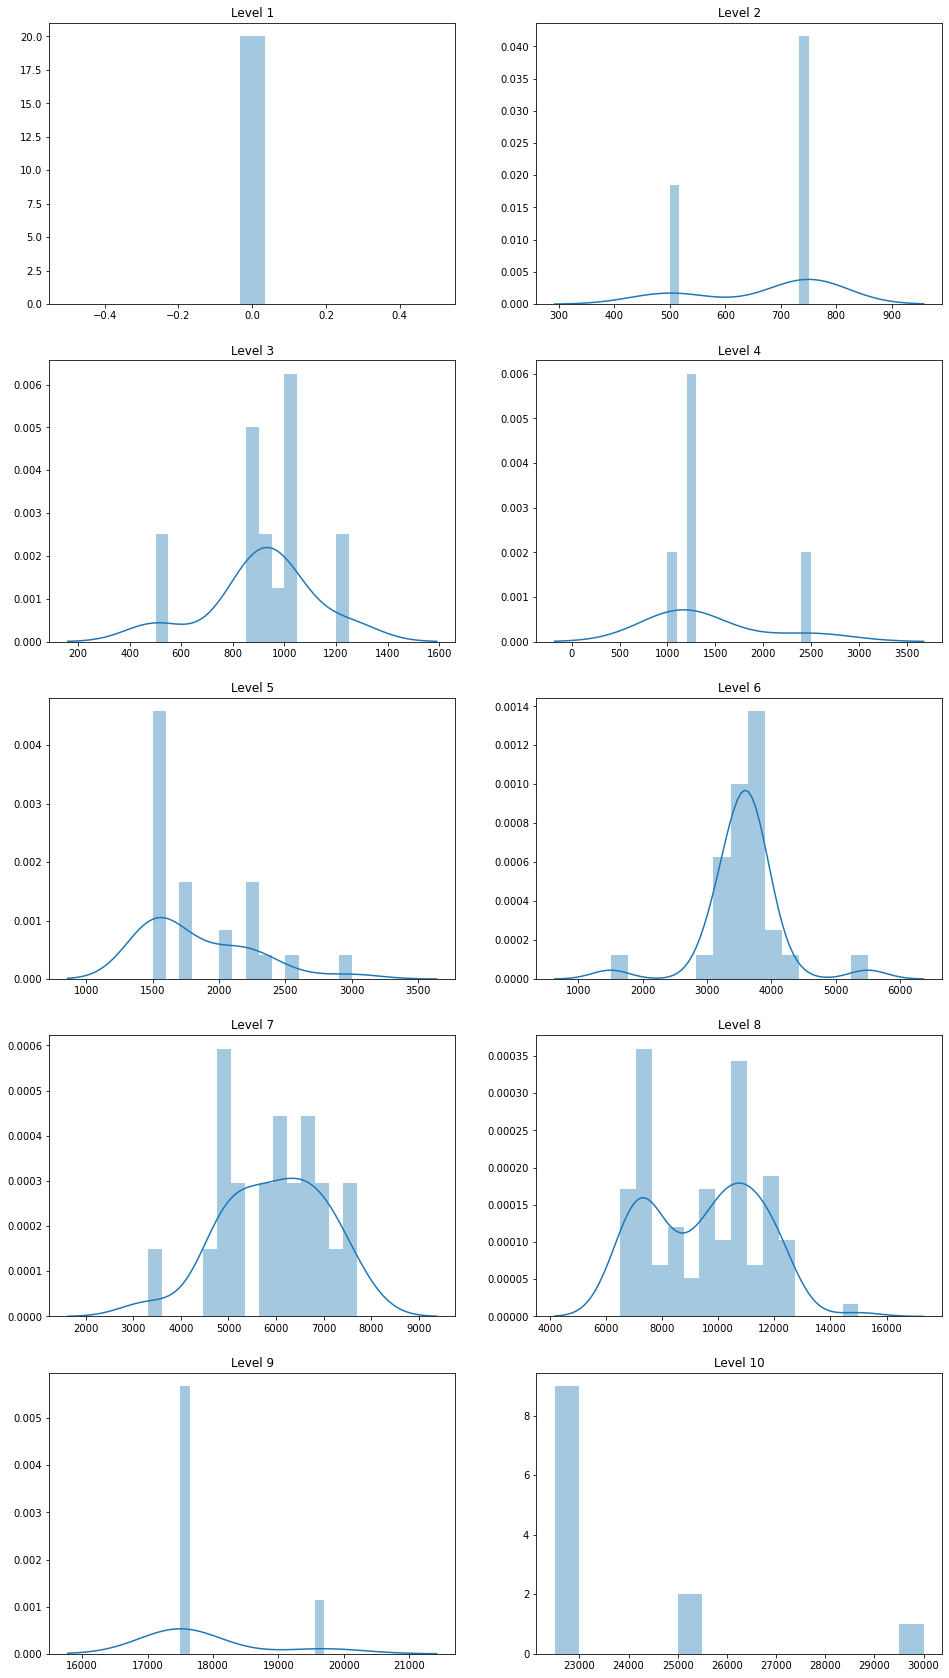

In [336]:
price_ditributions(gold_catalog, price='gold')

In [40]:
catalog.shape

(753, 6)

In [41]:
catalog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 0 to 887
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   item_cd            753 non-null    int64 
 1   item_class         753 non-null    object
 2   item_price_credit  753 non-null    int64 
 3   item_price_gold    753 non-null    int64 
 4   item_level         753 non-null    int64 
 5   crew_size          753 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 41.2+ KB


In [42]:
catalog.describe()

item_cd  item_price_credit  item_price_gold  item_level  \
count    753.000000       7.530000e+02       753.000000  753.000000   
mean   23770.243028       1.168060e+06      2238.698539    6.175299   
std    22300.034277       1.844741e+06      4594.101058    2.525103   
min        1.000000       0.000000e+00         0.000000    1.000000   
25%     4993.000000       0.000000e+00         0.000000    4.000000   
50%    14625.000000       1.400000e+05         0.000000    6.000000   
75%    49937.000000       1.400000e+06      1500.000000    8.000000   
max    65345.000000       6.100000e+06     30000.000000   10.000000   

        crew_size  
count  753.000000  
mean     4.290837  
std      0.964328  
min      2.000000  
25%      4.000000  
50%      4.000000  
75%      5.000000  
max      6.000000

In [43]:
# --> no duplicates
catalog.duplicated().sum()

0

In [44]:
# --> no missing values
catalog.isnull().sum()

item_cd              0
item_class           0
item_price_credit    0
item_price_gold      0
item_level           0
crew_size            0
dtype: int64

#  removed tanks

In [66]:
s1 = set(removed_tanks['item_cd'])
s2 = set(data['vehicle_type_cd'])

removed_ids = s1.intersection(s2)

print(removed_ids)

{6225, 13889, 9297, 65281}


In [51]:
removed_tanks[removed_tanks['item_cd'] == 9297]

item_cd item_class  item_price_credit  item_price_gold  item_level  \
288     9297     AT-SPG                  0                5          10   

     crew_size  
288          5

In [34]:
data[data['vehicle_type_cd'] == 9297]

dt           arena_id account_db_id  team_id  clan_db_id  \
259      2018-10-27  4yNy1TNaa7yd71T4c     cdcyd44Ta        2   500019571   
3252     2018-10-17  424y7TyaNcyyT4cTy     cyNy71y2c        2   500135958   
3269     2018-10-17  424y7TyaNcyyT4cTy     c2yyN4a22        1   500040230   
3498     2018-10-17  424y12T24Ny22TTTa     cyyT1T4cN        1   500159862   
3653     2018-10-17  424y7yd21cddc7cdd     c2yTNddca        2   500069934   
...             ...                ...           ...      ...         ...   
1377598  2018-10-17  21cN2N1TydaT1dc27     cdyc7TddN        1   500012667   
1383488  2018-10-17  24Ndc74a7NcyTTTNN     ca2adcNd2        2   500004709   
1386077  2018-10-26    12ac27ycN147ad7     cdaa1TTdy        2           0   
1394142  2018-10-17  a2adaNdTcTTNd1Naa     cdacaT4Tc        2   500156864   
1400271  2018-10-17  4d272a2d7aT41y7Nc     cyy1c4T7d        2   500150826   

         prebattle_id  is_prebattle_creator  vehicle_type_cd  life_time_sec  \
259                 0                     0             9297            365   
3252                0                     0             9297            415   
3269                0                     0             9297            477   
3498                0                     0             9297            656   
3653                0                     0             9297            323   
...               ...                   ...              ...            ...   
1377598             0                     0             9297            356   
1383488             0                     0             9297            281   
1386077             0                     0             9297            433   
1394142             0                     0             9297            290   
1400271             0                     0             9297            144   

         shots  ...  mileage_meter  remained_hp  original_credits  \
259          5  ...           1226            0             22046   
3252         5  ...           1117            0             34650   
3269         9  ...           1339         1330            104877   
3498         8  ...           2342          874             52922   
3653         3  ...           1267         2000             18123   
...        ...  ...            ...          ...               ...   
1377598      6  ...           1181         1237             38034   
1383488      3  ...            528            0             25070   
1386077      1  ...           1512          370             11817   
1394142      4  ...            797         1713             24936   
1400271      1  ...            818            0             15137   

         original_xp  premium_xp_factor  daily_xp_factor  battle_num  \
259              384                 15               10       34065   
3252             622                 15               10       41198   
3269            4430                 15               20       22696   
3498            1646                 15               10       51289   
3653            1488                 15               20       38614   
...              ...                ...              ...         ...   
1377598         2189                 15               20       66027   
1383488          412                 15               10       33198   
1386077         2368                 15               40       45529   
1394142          891                 15               10       29711   
1400271          213                 15               10       34186   

         damage_blocked_by_armor  booster_bonus_credits  booster_bonus_xp  
259                         1270                      0                 0  
3252                        1400                      0               201  
3269                        1140                  34959               869  
3498                           0                      0                 0  
3653                         390                      0              

## Have a closer look at some features

In [52]:
for feature in ['item_class']:
    catalog[feature] = pd.Categorical(catalog[feature])

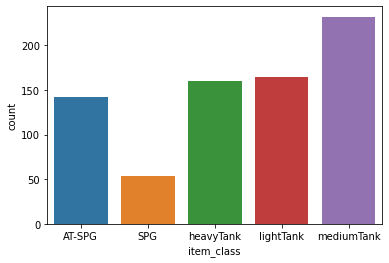

In [53]:
sns.countplot(catalog['item_class']);

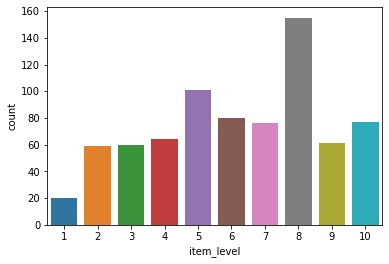

In [54]:
sns.countplot(catalog['item_level']);

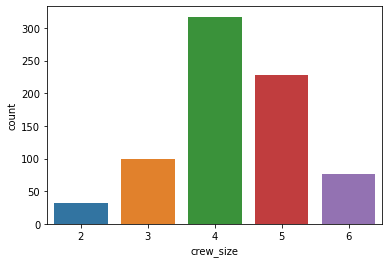

In [55]:
sns.countplot(catalog['crew_size']);

# Working with "data" dataset

In [56]:
data.head()

dt           arena_id account_db_id  team_id  clan_db_id  \
0  2018-10-27  4yNy14y4yN12d42dT     c42c4aydT        2           0   
1  2018-10-27  4yNy14y4yN12d42dT     c2TaaayN4        1   500033550   
2  2018-10-27  4yNy14y4yN12d42dT     cyyd47dc4        2   500051107   
3  2018-10-27  4yNy14y4yN12d42dT     c2cdc441y        2           0   
4  2018-10-27  4yNy14y4yN12d42dT     cdT7cTT21        1           0   

   prebattle_id  is_prebattle_creator  vehicle_type_cd  life_time_sec  shots  \
0             0                     0             2849            132      3   
1             0                     0            63553            195      6   
2      67896661                     0            17665            224     11   
3             0                     0            11537            381      8   
4             0                     0             7937            198      5   

   ...  mileage_meter  remained_hp  original_credits  original_xp  \
0  ...            459           -3             27279         1084   
1  ...            708            0              6282           68   
2  ...            656            0             36102         3560   
3  ...           1912          387             16317         1678   
4  ...            507            0             11620          232   

   premium_xp_factor  daily_xp_factor  battle_num  damage_blocked_by_armor  \
0                 15               20       11956                        0   
1                 15               10        9832                        0   
2                 15               20       39190                        0   
3                 15               20        7217                        0   
4                 15               10        9532                        0   

   booster_bonus_credits  booster_bonus_xp  
0                      0                 0  
1                      0                 0  
2                      0              1130  
3                      0                 0  
4                      0                 0  

[5 rows x 34 columns]

In [82]:
mask = ~data['vehicle_type_cd'].isin(removed_ids)

removed_data = data.loc[~mask]
data = data.loc[mask]

data.reset_index()
removed_data.reset_index();

## Check if there are any duplicates

In [83]:
# --> no duplicates
data.duplicated().sum()

0

## Check if there are any missing values

In [84]:
#  --> no null values
data.isnull().sum()

dt                          0
arena_id                    0
account_db_id               0
team_id                     0
clan_db_id                  0
prebattle_id                0
is_prebattle_creator        0
vehicle_type_cd             0
life_time_sec               0
shots                       0
hits                        0
he_hits                     0
pierced                     0
damage_dealt                0
damage_assisted_radio       0
damage_assisted_stun        0
damage_assisted_track       0
damage_received             0
shots_received              0
no_damage_shots_received    0
pierced_received            0
spotted                     0
damaged                     0
kills_made                  0
mileage_meter               0
remained_hp                 0
original_credits            0
original_xp                 0
premium_xp_factor           0
daily_xp_factor             0
battle_num                  0
damage_blocked_by_armor     0
booster_bonus_credits       0
booster_bo

In [85]:
data.describe()

life_time_sec         shots          hits       he_hits       pierced  \
count   1.402958e+06  1.402958e+06  1.402958e+06  1.402958e+06  1.402958e+06   
mean    2.976125e+02  7.738088e+00  5.339142e+00  3.320121e-01  3.643013e+00   
std     1.348247e+02  5.083874e+00  4.033766e+00  1.314188e+00  3.004952e+00   
min     8.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     2.010000e+02  4.000000e+00  2.000000e+00  0.000000e+00  1.000000e+00   
50%     2.870000e+02  7.000000e+00  5.000000e+00  0.000000e+00  3.000000e+00   
75%     3.740000e+02  1.000000e+01  7.000000e+00  0.000000e+00  5.000000e+00   
max     9.000000e+02  6.300000e+01  5.100000e+01  2.700000e+01  4.000000e+01   

       damage_dealt  damage_assisted_radio  damage_assisted_stun  \
count  1.402958e+06           1.402958e+06          1.402958e+06   
mean   1.150214e+03           3.252435e+02          4.155660e+01   
std    9.360209e+02           5.202141e+02          2.215462e+02   
min    0.000000e+00           0.000000e+00          0.000000e+00   
25%    4.430000e+02           0.000000e+00          0.000000e+00   
50%    9.550000e+02           1.150000e+02          0.000000e+00   
75%    1.644000e+03           4.530000e+02          0.000000e+00   
max    1.012800e+04           1.277600e+04          6.027000e+03   

       damage_assisted_track  damage_received  ...  mileage_meter  \
count           1.402958e+06     1.402958e+06  ...   1.402958e+06   
mean            6.854616e+01     1.162548e+03  ...   1.172246e+03   
std             2.008490e+02     5.268389e+02  ...   7.146780e+02   
min             0.000000e+00     0.000000e+00  ...   0.000000e+00   
25%             0.000000e+00     9.000000e+02  ...   6.920000e+02   
50%             0.000000e+00     1.300000e+03  ...   1.027000e+03   
75%             0.000000e+00     1.500000e+03  ...   1.507000e+03   
max             5.488000e+03     3.000000e+03  ...   1.491800e+04   

        remained_hp  original_credits   original_xp  premium_xp_factor  \
count  1.402958e+06      1.402958e+06  1.402958e+06       1.402958e+06   
mean   1.897758e+02      3.101764e+04  1.051120e+03       1.499911e+01   
std    3.943647e+02      2.388215e+04  1.048548e+03       1.153706e-01   
min   -1.300000e+01     -1.037000e+03  0.000000e+00       0.000000e+00   
25%    0.000000e+00      1.472100e+04  3.300000e+02       1.500000e+01   
50%    0.000000e+00      2.421600e+04  6.900000e+02       1.500000e+01   
75%    1.180000e+02      3.972800e+04  1.418000e+03       1.500000e+01   
max    3.000000e+03      3.055860e+05  1.341000e+04       1.500000e+01   

       daily_xp_factor    battle_num  damage_blocked_by_armor  \
count     1.402958e+06  1.402958e+06             1.402958e+06   
mean      1.358995e+01  2.330440e+04             4.412997e+02   
std       7.431287e+00  1.681411e+04             7.220207e+02   
min       0.000000e+00  2.501000e+03             0.000000e+00   
25%       1.000000e+01  1.052100e+04             0.000000e+00   
50%       1.000000e+01  1.931200e+04             0.000000e+00   
75%       2.000000e+01  3.192300e+04             6.400000e+02   
max       4.000000e+01  2.210440e+05             1.665000e+04   

       booster_bonus_credits  booster_bonus_xp  
count           1.402958e+06      1.402958e+06  
mean            2.002091e+03      1.087956e+02  
std             7.046242e+03      2.797172e+02  
min             0.000000e+00      0.000000e+00  
25%             0.000000e+00      0.000000e+00  
50%             0.000000e+00      0.000000e+00  
75%             0.000000e+00      0.000000e+00  
max             1.577200e+05      3.274000e+03  

[8 rows x 26 columns]

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403405 entries, 0 to 1403404
Data columns (total 34 columns):
 #   Column                    Non-Null Count    Dtype 
---  ------                    --------------    ----- 
 0   dt                        1403405 non-null  object
 1   arena_id                  1403405 non-null  object
 2   account_db_id             1403405 non-null  object
 3   team_id                   1403405 non-null  int64 
 4   clan_db_id                1403405 non-null  int64 
 5   prebattle_id              1403405 non-null  int64 
 6   is_prebattle_creator      1403405 non-null  int64 
 7   vehicle_type_cd           1403405 non-null  int64 
 8   life_time_sec             1403405 non-null  int64 
 9   shots                     1403405 non-null  int64 
 10  hits                      1403405 non-null  int64 
 11  he_hits                   1403405 non-null  int64 
 12  pierced                   1403405 non-null  int64 
 13  damage_dealt              1403405 non-null

## Have a closer look at some features

In [86]:
for feature in ['arena_id', 'account_db_id', 'team_id', 'clan_db_id', 
               'prebattle_id', 'is_prebattle_creator', 'vehicle_type_cd']:
    data[feature] = pd.Categorical(data[feature])
    
data['dt'] = pd.to_datetime(data['dt'])

### dt

All battles took place in October 2018 (between October 1 and October 31)

In [87]:
data['dt'].describe()

count                 1402958
unique                     31
top       2018-10-10 00:00:00
freq                    90939
first     2018-10-01 00:00:00
last      2018-10-31 00:00:00
Name: dt, dtype: object

### arena_id

47.363 unique battles were held.

There were 30 players in most battles (30 -> 20 -> 14). 
However, in some battles, a number of players was either odd (19, 13) or 
strangely small (2, 4). Are those battles connected to special events?

In [88]:
battles = data['arena_id'].value_counts()
battles

yyyyd1d41y77yN4      30
4TNN1T2TdT12d7y7a    30
4TNN1T1TyN77TNadc    30
4TNN1Nya1ayd274N2    30
4TNN1Ny1y2cNTcTaN    30
                     ..
424y1a22T2d7T11a7     4
71a1daddT4yN4c7       4
Ty7cc77dTNNd7N4       3
Ty72acc1444a4d1       3
4d2721ay1a7c11Nya     2
Name: arena_id, Length: 47363, dtype: int64

In [89]:
battles.to_frame()['arena_id'].value_counts()

30    45479
20     1033
14      417
29      373
28       26
19        8
27        5
13        5
12        4
18        3
3         2
4         2
6         1
17        1
7         1
21        1
24        1
2         1
Name: arena_id, dtype: int64

### account_db_id

367.746 unique players took part in battles.

In [90]:
data['account_db_id'].value_counts()

c2aTcT4y4    214
cdNcaNN77    201
c277NNN2y    140
cadaaNc77    121
c4NacTcc4     98
            ... 
cd24N4yN1      0
cdacTy41N      0
cd2y2yd74      0
ca47Na4yd      0
cda2ycyTy      0
Name: account_db_id, Length: 367746, dtype: int64

### team_id

Either 1 or 2

In [91]:
data['team_id'].value_counts()

2    701500
1    701458
Name: team_id, dtype: int64

### prebattle_id, is_prebattle_creator

~83% of players were not a part of any platoon

In [92]:
data[data['prebattle_id'] == 0].shape[0] / data.shape[0]

0.8267403585852178

In [93]:
data['is_prebattle_creator'].value_counts()

0    1303642
1      99316
Name: is_prebattle_creator, dtype: int64

### vehicle_type_cd

All tanks used in the battles are real (there is a corresponding entry in "catalog")

In [94]:
data['vehicle_type_cd'].describe()

count     1402958
unique        347
top         50193
freq        77041
Name: vehicle_type_cd, dtype: int64

In [95]:
data['vehicle_type_cd'].unique().isin(catalog['item_cd']).sum()

347

### Different battle characteristics

Need to be normalized to lifetime in a battle / mileage meter

In [96]:
target_params = ['shots', 'hits', 'he_hits', 'pierced']
damage_params = ['damage_dealt', 'damage_assisted_track', 'damage_assisted_radio', 
               'damage_assisted_stun']
income_params = ['damage_received', 'shots_received', 'no_damage_shots_received',
                'pierced_received']

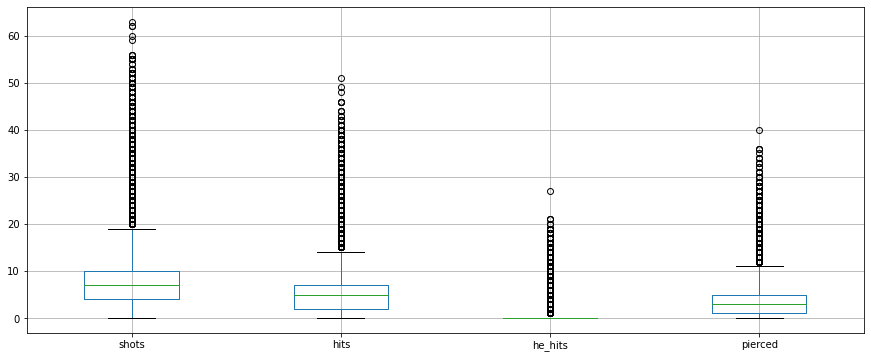

In [97]:
data[target_params].boxplot(figsize=(15, 6));

In [40]:
data[target_params].corr()

shots      hits   he_hits   pierced
shots    1.000000  0.889610  0.042683  0.793251
hits     0.889610  1.000000 -0.164124  0.882728
he_hits  0.042683 -0.164124  1.000000 -0.090778
pierced  0.793251  0.882728 -0.090778  1.000000

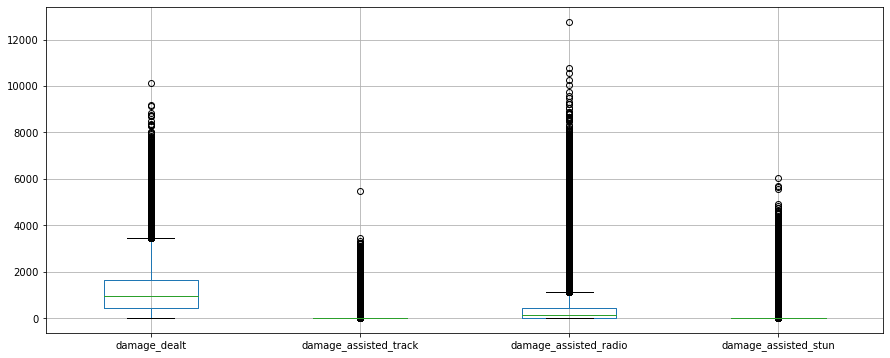

In [41]:
data[damage_params].boxplot(figsize=(15, 6));

In [42]:
data[damage_params].corr()

damage_dealt  damage_assisted_track  \
damage_dealt               1.000000               0.163000   
damage_assisted_track      0.163000               1.000000   
damage_assisted_radio      0.083237               0.032366   
damage_assisted_stun       0.052318              -0.020924   

                       damage_assisted_radio  damage_assisted_stun  
damage_dealt                        0.083237              0.052318  
damage_assisted_track               0.032366             -0.020924  
damage_assisted_radio               1.000000             -0.112695  
damage_assisted_stun               -0.112695              1.000000

In [43]:
data[income_params].describe()

damage_received  shots_received  no_damage_shots_received  \
count     1.403405e+06    1.403405e+06              1.403405e+06   
mean      1.162685e+03    5.298493e+00              1.668618e+00   
std       5.269663e+02    3.593657e+00              2.452909e+00   
min       0.000000e+00    0.000000e+00              0.000000e+00   
25%       9.000000e+02    3.000000e+00              0.000000e+00   
50%       1.300000e+03    5.000000e+00              1.000000e+00   
75%       1.500000e+03    7.000000e+00              2.000000e+00   
max       3.000000e+03    6.700000e+01              6.200000e+01   

       pierced_received  
count      1.403405e+06  
mean       3.629874e+00  
std        1.881227e+00  
min        0.000000e+00  
25%        2.000000e+00  
50%        4.000000e+00  
75%        5.000000e+00  
max        2.000000e+01

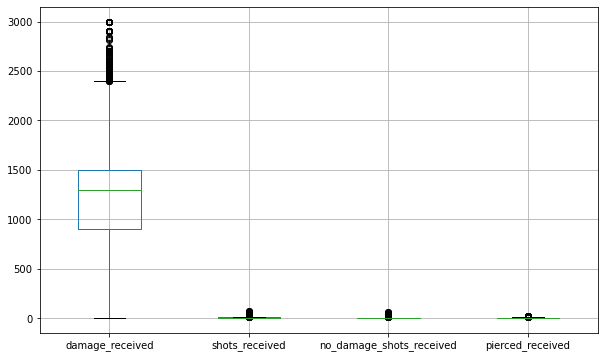

In [44]:
data[income_params].boxplot(figsize=(10, 6));

### life_time_sec

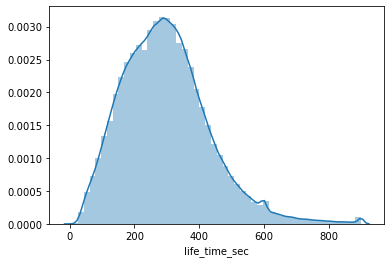

In [98]:
sns.distplot(data['life_time_sec']);

## Create new features (normalized to time/etc) 

In [99]:
def normalize_feature(target_feature, norm_feature):
    if norm_feature != 0:
        return target_feature / norm_feature
    else:
        return 0
    
normalize_feature = np.vectorize(normalize_feature)

### Normalize to time

In [100]:
target_features = ['shots', 'hits', 'he_hits', 'pierced', 'damage_dealt', 
                   'damage_assisted_track', 'damage_assisted_radio', 
                   'damage_assisted_stun', 'damage_received', 'shots_received', 
                   'no_damage_shots_received', 'pierced_received', 'spotted', 
                   'damaged', 'kills_made', 'mileage_meter']
# target_features = ['shots']

for feature in target_features:
    new_feature = feature + '_per_sec'
    data[new_feature] = normalize_feature(data[feature], data['life_time_sec'])

### Compare distributions before and after normalization

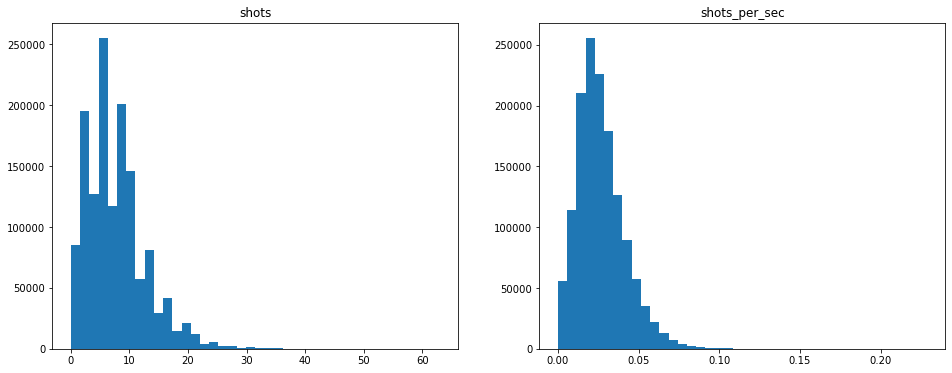

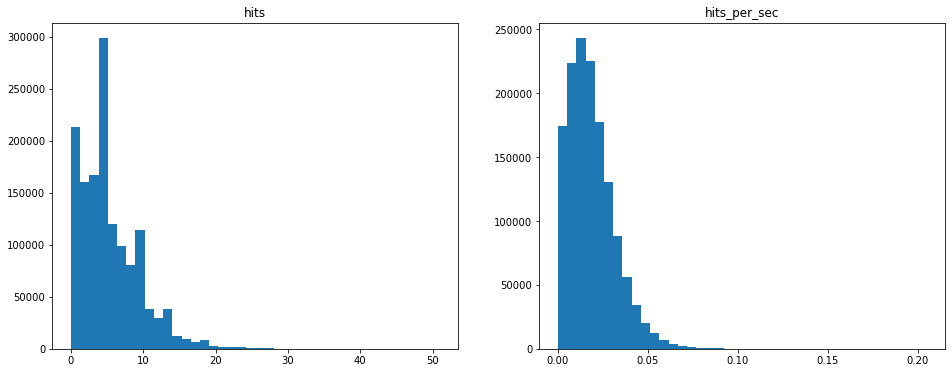

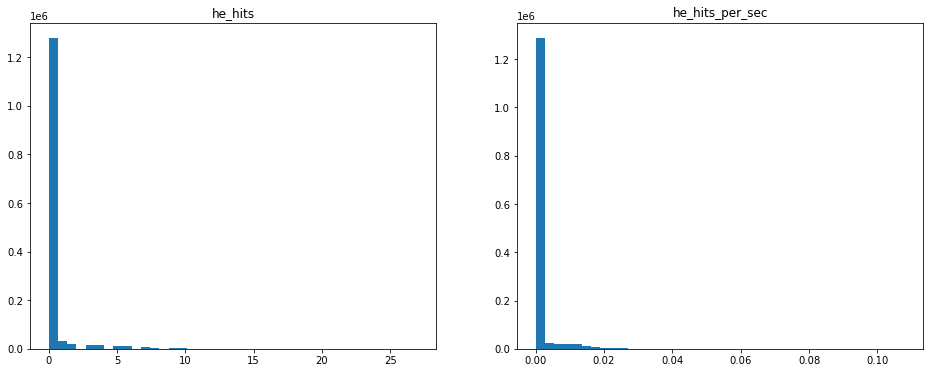

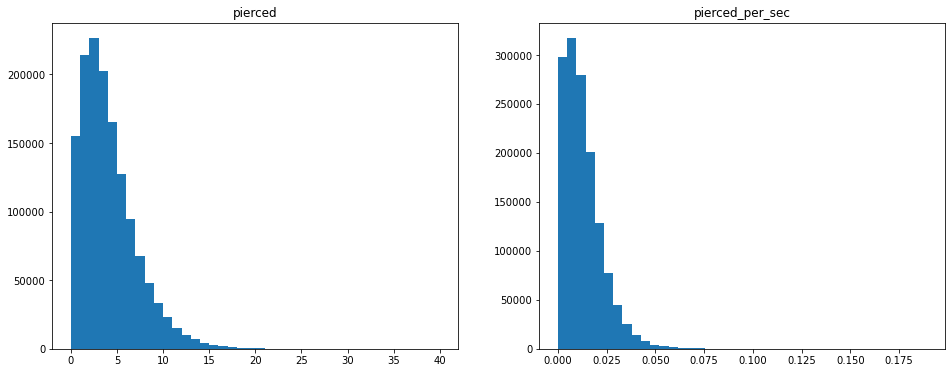

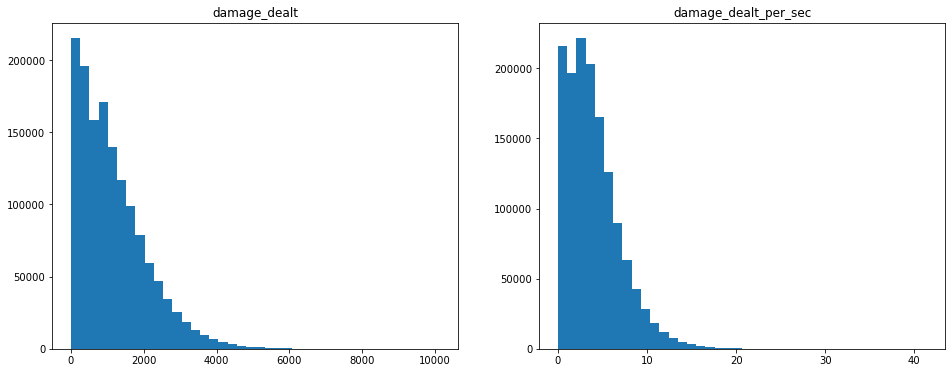

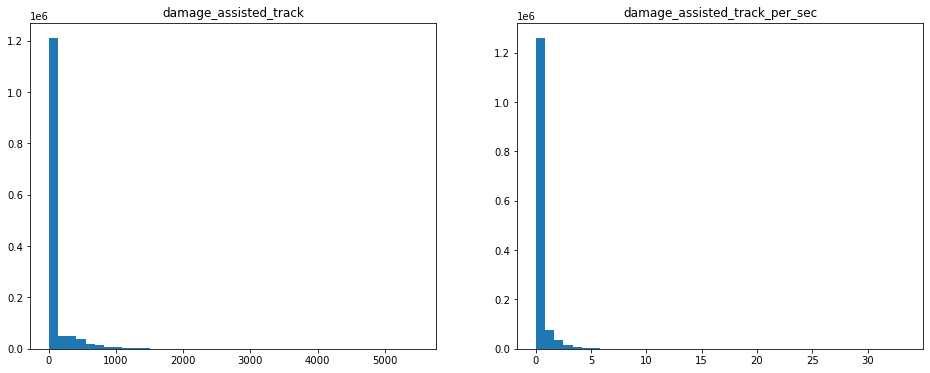

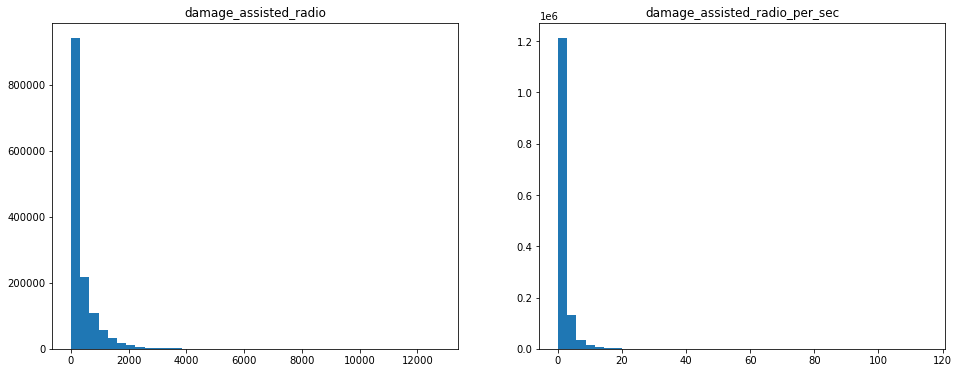

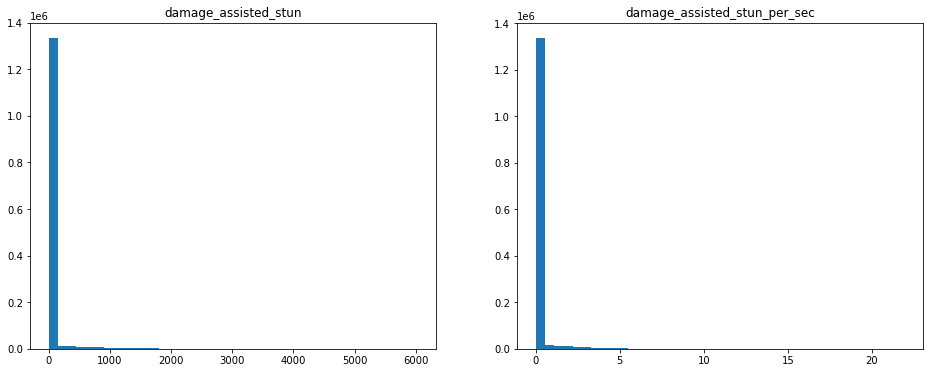

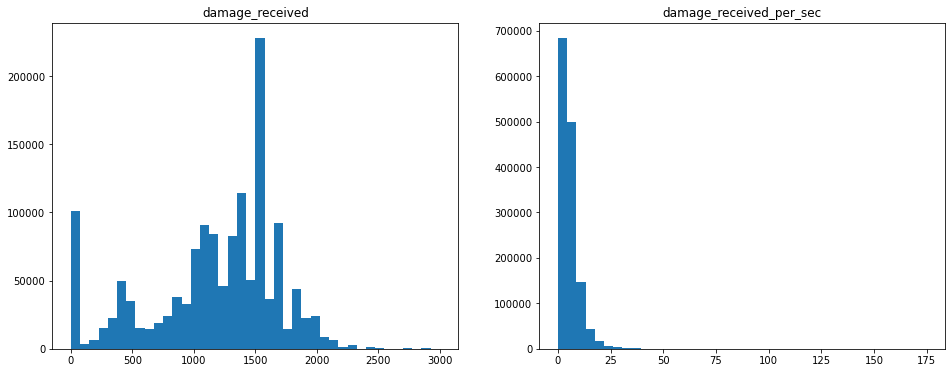

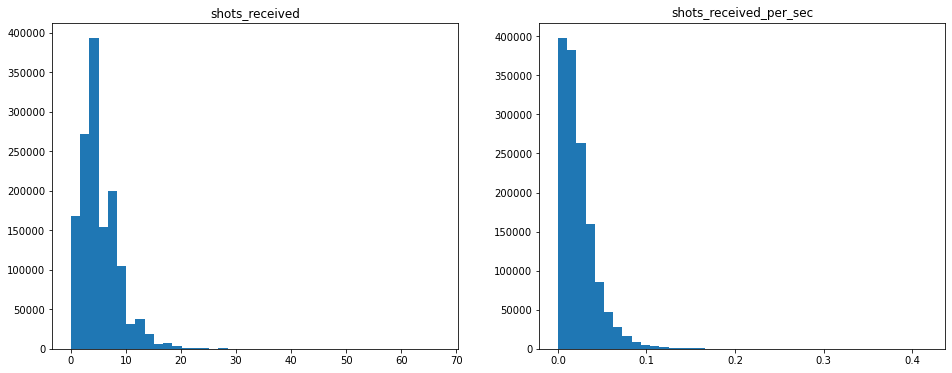

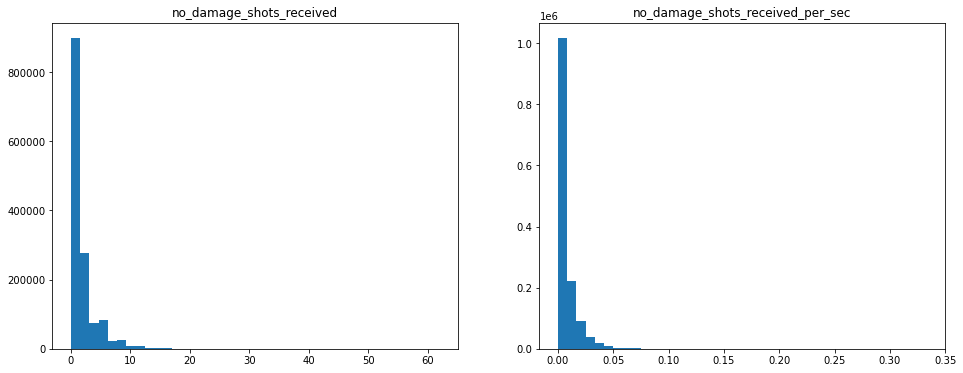

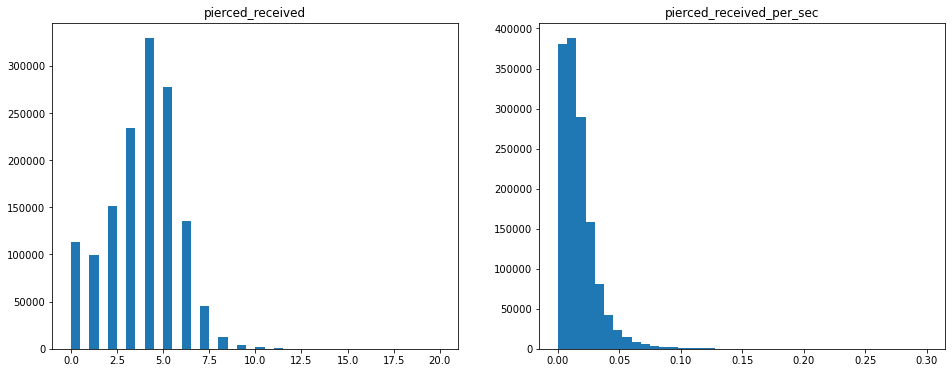

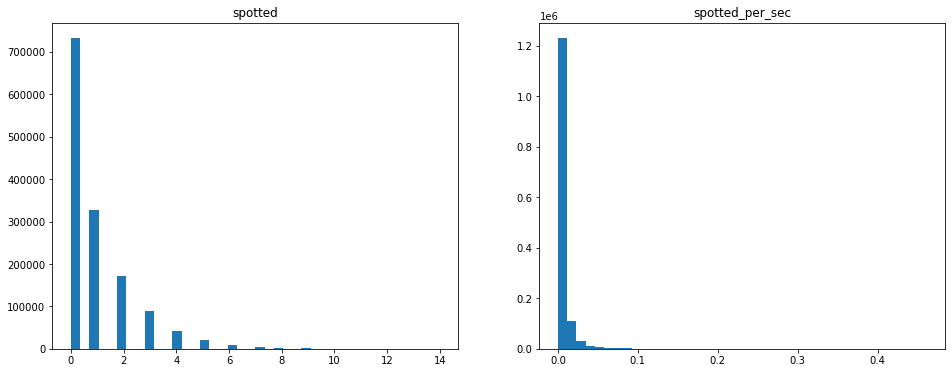

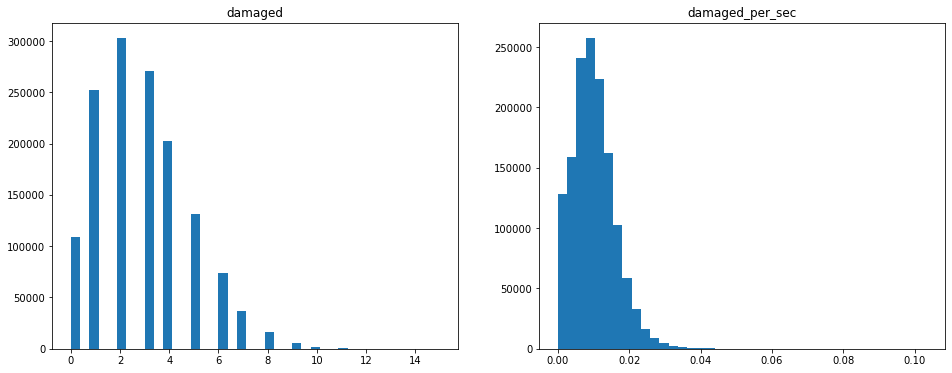

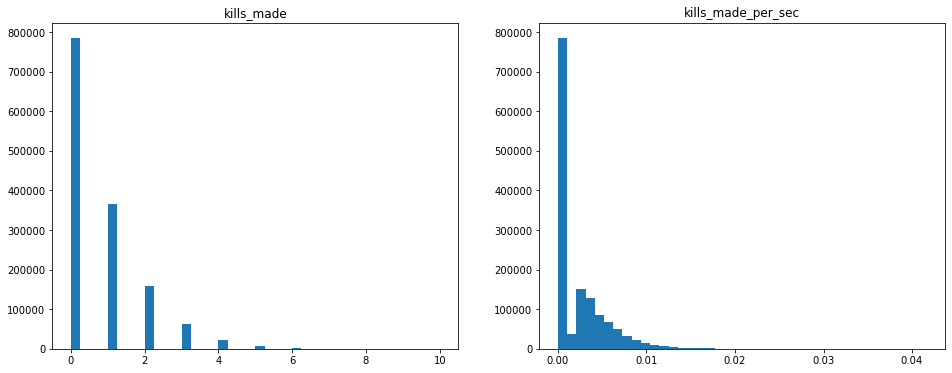

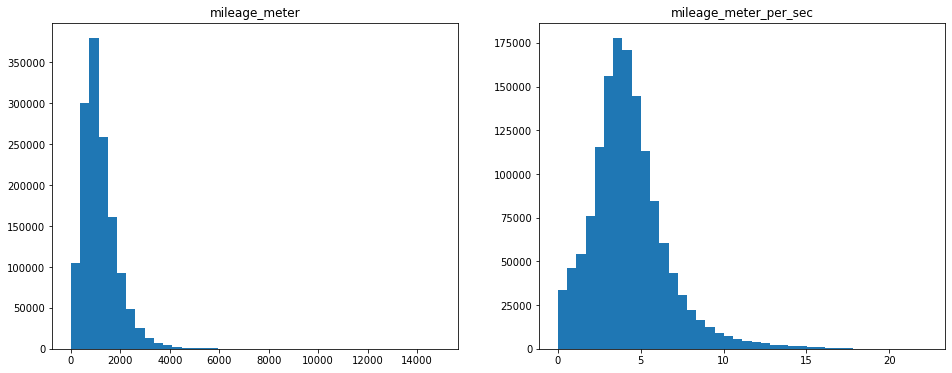

In [101]:
for feature in target_features:
    new_feature = feature + '_per_sec'

    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    axes[0].hist(data[feature], bins=40)
    axes[1].hist(data[new_feature], bins=40)
    
    axes[0].set_title(feature)
    axes[1].set_title(new_feature)